# Action2智能供应链分析     

数据集：SupplyChainDataset.csv，供应链采购数据     To Do：     供应链数据探索

In [2]:
import pandas as pd

In [4]:
# 数据加载
dataset = pd.read_csv('./SupplyChain.csv', encoding='unicode_escape' )
dataset

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


In [5]:
dataset.shape

(180519, 53)

In [7]:
temp_null = dataset.isnull().sum()
temp_null[temp_null>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [8]:
dataset[['Customer Fname','Customer Lname']]

,Customer Fname,Customer Lname
0,Cally,Holloway
1,Irene,Luna
2,Gillian,Maldonado
3,Tana,Tate
4,Orli,Hendricks
...,...,...
180514,Maria,Peterson
180515,Ronald,Clark
180516,John,Smith
180517,Mary,Smith


In [9]:
dataset['Customer Full Name'] = dataset['Customer Fname'] + dataset['Customer Lname']
dataset[['Customer Full Name','Customer Fname','Customer Lname']]

,Customer Full Name,Customer Fname,Customer Lname
0,CallyHolloway,Cally,Holloway
1,IreneLuna,Irene,Luna
2,GillianMaldonado,Gillian,Maldonado
3,TanaTate,Tana,Tate
4,OrliHendricks,Orli,Hendricks
...,...,...,...
180514,MariaPeterson,Maria,Peterson
180515,RonaldClark,Ronald,Clark
180516,JohnSmith,John,Smith
180517,MarySmith,Mary,Smith


In [13]:
print(dataset['Customer Zipcode'].value_counts())
print('缺失值个数：', dataset['Customer Zipcode'].isnull().sum())
# 3个缺失值
dataset['Customer Zipcode'] = dataset['Customer Zipcode'].fillna(0)
print('缺失值个数：', dataset['Customer Zipcode'].isnull().sum())

725.0      66770
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
89015.0       16
32210.0       15
7728.0        13
11225.0        9
0.0            3
Name: Customer Zipcode, Length: 996, dtype: int64
缺失值个数： 0
缺失值个数： 0


<AxesSubplot:>

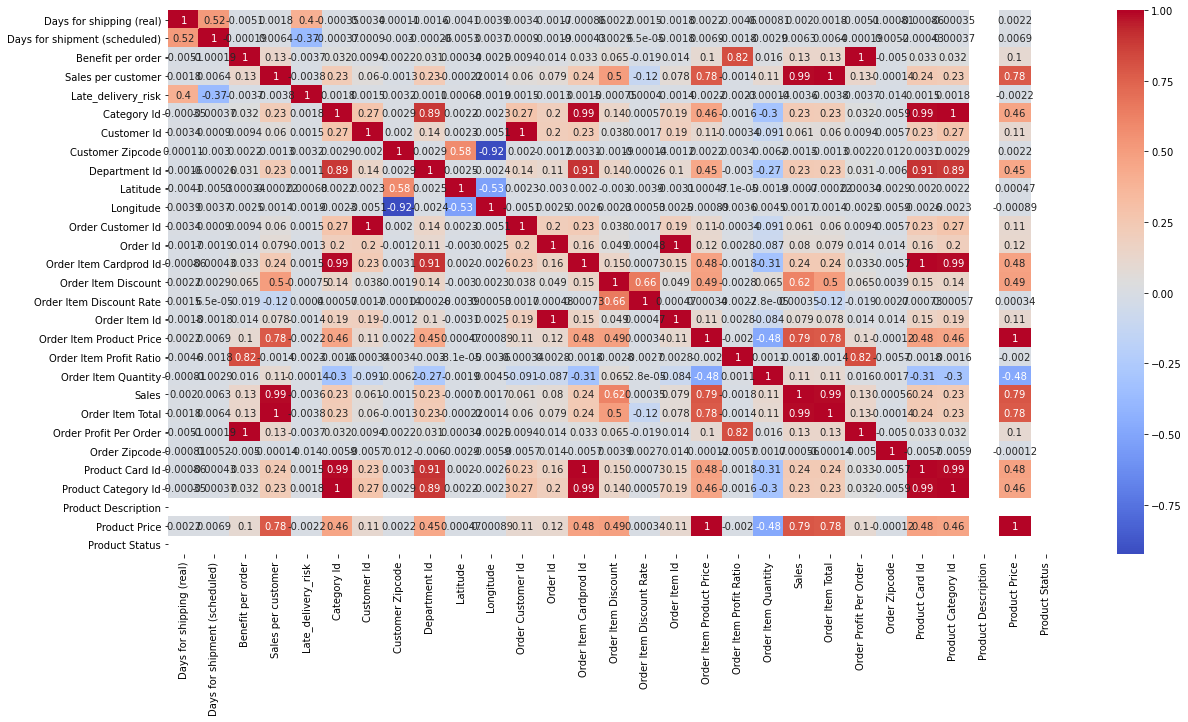

In [15]:
# 热力图数据探索,0独立，越偏0越相关
import matplotlib.pyplot as plt
import seaborn as sns
data = dataset
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm') # annot显示方框里面的数字

<AxesSubplot:title={'center':'Sales in different market'}, xlabel='Market'>

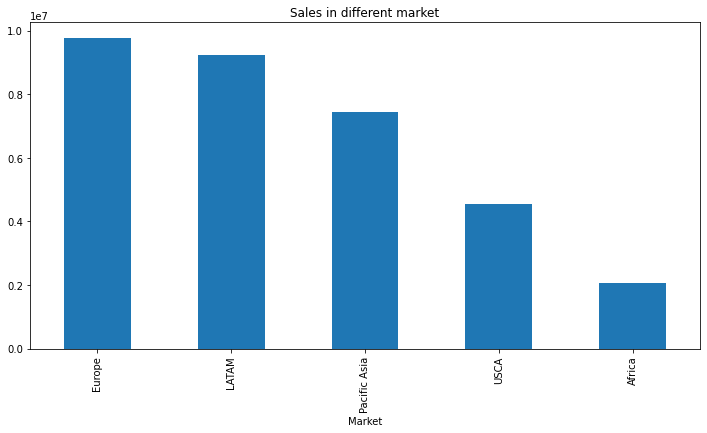

In [18]:
# 安装不同的Market，Order Region数据探索
# 基于Market
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different market')# 从大到小排序

<AxesSubplot:title={'center':'Sales in different regions'}, xlabel='Order Region'>

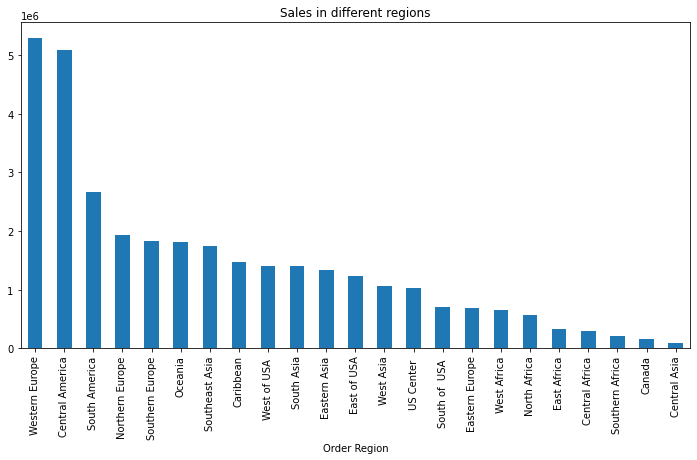

In [19]:
# 基于 Order Region
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different regions')

<AxesSubplot:title={'center':'Sales in different categories'}, xlabel='Category Name'>

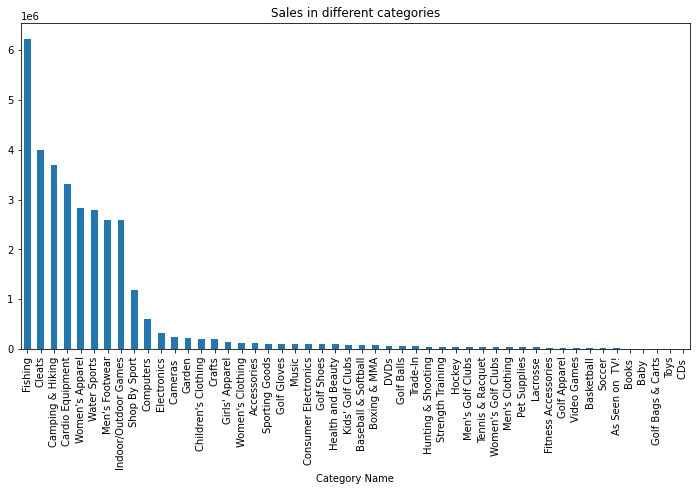

In [21]:
# 按照不同的Category Name
eat = data.groupby('Category Name')
eat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6),title='Sales in different categories')

In [22]:
# 按照不同的时间维度（年，月，星期，小时）的趋势
data['order date (DateOrders)'].describe()

count              180519
unique              65752
top       1/21/2016 12:35
freq                    5
Name: order date (DateOrders), dtype: object

In [24]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks


In [23]:
# 创建时间戳索引
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [26]:
# 获取不同尺度的时间 order date (DateOrders)中的year,month,week_day,hour,month_year
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data['order_month_year'] = temp.to_period('M') # 截取时间到M month为止
data[['order_year', 'order_month', 'order_week_day', 'order_hour', 'order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


In [32]:
temp.to_period('M')

PeriodIndex(['2018-01', '2018-01', '2018-01', '2018-01', '2018-01', '2018-01',
             '2018-01', '2018-01', '2018-01', '2018-01',
             ...
             '2016-01', '2016-01', '2016-01', '2016-01', '2016-01', '2016-01',
             '2016-01', '2016-01', '2016-01', '2016-01'],
            dtype='period[M]', name='order date (DateOrders)', length=180519, freq='M')

In [29]:
data[['order_week_day']].min(),data[['order_week_day']].max()

(order_week_day    0
 dtype: int64,
 order_week_day    6
 dtype: int64)

<AxesSubplot:title={'center':'Mean Sales in months'}, xlabel='order_month'>

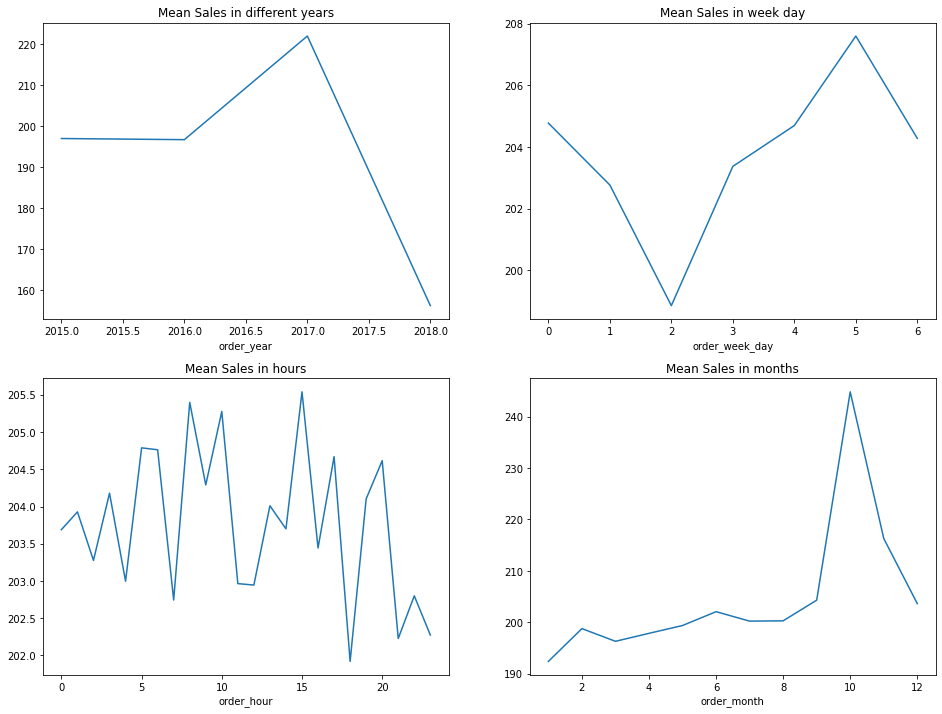

In [40]:
# 对销售额进行探索，按照不同的事件维度 年、星期、小时、月
plt.figure(figsize=(10,12))

plt.subplot(2, 2, 1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in different years')

plt.subplot(2, 2, 2)
df_day = data.groupby('order_week_day')
df_day['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in week day')

plt.subplot(2, 2, 3)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in hours')

plt.subplot(2, 2, 4)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(figsize=(16,12),title='Mean Sales in months')

Text(0, 0.5, 'Sales per customer')

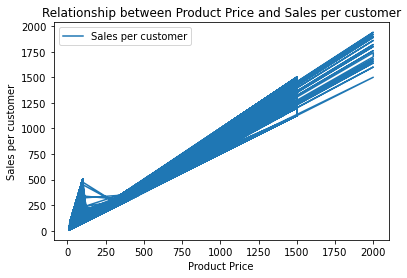

In [45]:
#Product Price与Sales per customer 相关性如何
# 大概趋势是价格越高销售额愈大
data.plot(x='Product Price', y='Sales per customer')
plt.title('Relationship between Product Price and Sales per customer')
plt.xlabel('Product Price')
plt.ylabel('Sales per customer')